# Content

## Attributes of this Dataset

**People**

ID: Customer's unique identifier<br>
Year_Birth: Customer's birth year<br>
Education: Customer's education level<br>
Marital_Status: Customer's marital status<br>
Income: Customer's yearly household income<br>
Kidhome: Number of children in customer's household<br>
Teenhome: Number of teenagers in customer's household<br>
Dt_Customer: Date of customer's enrollment with the company<br>
Recency: Number of days since customer's last purchase<br>
Complain: 1 if the customer complained in the last 2 years, 0 otherwise<br>
<br>
**Products**<br>
<br>
MntWines: Amount spent on wine in last 2 years<br>
MntFruits: Amount spent on fruits in last 2 years<br>
MntMeatProducts: Amount spent on meat in last 2 years<br>
MntFishProducts: Amount spent on fish in last 2 years<br>
MntSweetProducts: Amount spent on sweets in last 2 years<br>
MntGoldProds: Amount spent on gold in last 2 years<br>
<br>
**Promotion**<br>
<br>
NumDealsPurchases: Number of purchases made with a discount<br>
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise<br>
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise<br>
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise<br>
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise<br>
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise<br>
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise<br>
<br>
**Place**<br>
<br>
NumWebPurchases: Number of purchases made through the company’s website<br>
NumCatalogPurchases: Number of purchases made using a catalogue<br>
NumStorePurchases: Number of purchases made directly in stores<br>
NumWebVisitsMonth: Number of visits to company’s website in the last month<br>

# Target

**Need to perform clustering to summarize customer segments.**

## Importing Libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams, colors
import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch

## Data Loading

In [3]:
# the data is a tab separated file
data = pd.read_csv('marketing_campaign.csv', sep='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
pd. set_option('display.max_columns', 100)

## Data Cleaning

We will be understanding the data and clean it for building our model.

In [5]:
data.shape

(2240, 29)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
data.isnull().mean()

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 0.010714
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

**We can see from the data that:**

1. There are missing values in 'Income'
2. Dt_Customer is a string value, so we need to convert it into datetime
3. There are some categorical features in this datatset, so will have to encode them using suitable algorithms.


In [8]:
# as only 1% of Income is null, we can drop those rows that do not have the 'income' data

data = data.dropna()
data.shape

(2216, 29)

In [9]:
# let's convert the Dt_Customer column to datetime and also find the newset and oldest customers in the database

data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

# let's create  a list containing all the dates 

dates = []
for i in data['Dt_Customer']:
    i = i.date()
    dates.append(i)
    
print("Maximum date in the dataset:", max(dates))
print("Minimum date in the dataset:", min(dates))

Maximum date in the dataset: 2014-12-06
Minimum date in the dataset: 2012-01-08


In [10]:
# let's create a feature called No_of_Days_Customer which will basically indicate how long a person 
# has been a customer at that store

days = []
max_date = max(dates)

for date in dates:
    delta = max_date - date
    days.append(delta)
    
# here, we are getting the no of days as '___ days'.But we need to remove the word 'days'
data['No_of_Days_Customer'] = days
data['No_of_Days_Customer'] = data['No_of_Days_Customer'].apply(lambda x: x.days)
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,No_of_Days_Customer
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,971
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,125
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,472
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,65
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,321


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

There are 2 categorical features in this dataset - 'Education' and 'Marital_Status'. Let's see the different values they have

In [12]:
print(data['Education'].value_counts())

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [13]:
print(data['Marital_Status'].value_counts())

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


## Data Engineering

**Let's engineer some new features:**

* Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.
* Create another feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.
* Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.
* Create a feature "Children" to indicate total children in a household that is, kids and teenagers.
* To get further clarity of household, create a feature indicating "Family_Size"
* Create a feature "Is_Parent" to indicate parenthood status
* Lastly, I will create three categories in the "Education" by simplifying its value counts.
* Dropping some of the redundant features

In [14]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'No_of_Days_Customer'],
      dtype='object')

In [15]:
current_time = datetime.datetime.now()

# age of a customer by finding diff between current date and 'Year_Birth'
data['Age'] = current_time.year - data['Year_Birth']

# total amount spent on diffferent categories of food
data['Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds'] 

# if a customer is together with a partner or single
data['Living_With'] = data['Marital_Status'].replace({'Married': 'Partner', 'Together': 'Partner', 'Single' : 'Alone', 'Divorced' : 'Alone', 'Widow' :  'Alone', 'Absurd':  'Alone', 'YOLO':  'Alone' })

# total number of children in a home
data['Children'] = data['Kidhome'] + data['Teenhome']

# the family size of a customer
data['Family_Size'] = data['Living_With'].replace({'Alone': 1, 'Partner': 2}) + data['Children']

# if a customer is a parent or not
data['Is_Parent'] = np.where(data['Children'] > 0, 1, 0)

# simplifying the education levels
data['Education'] = data['Education'].replace({'Basic': 'Undergraduate', '2n Cycle': 'Undergraduate', 'Graduation': 'Graduate',   'Master' : 'Postgraduate',  'PhD': 'Postgraduate'})

# For better understanding, we will rename some columns
data = data.rename(columns={'MntWines': 'Wines', 'MntFruits': 'Fruits', 'MntMeatProducts': 'Meat', 'MntFishProducts': 'Fish', 'MntSweetProducts': 'Sweets', 'MntGoldProds': 'Gold'})
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,No_of_Days_Customer,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,5524,1957,Graduate,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,971,65,1617,Alone,0,1,0
1,2174,1954,Graduate,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,125,68,27,Alone,2,3,1
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,472,57,776,Partner,0,2,0
3,6182,1984,Graduate,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,65,38,53,Partner,1,3,1
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,321,41,422,Partner,1,3,1


In [16]:
# dropping some redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)


In [17]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,No_of_Days_Customer,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,971,65,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,125,68,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,472,57,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,65,38,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,321,41,422,Partner,1,3,1


In [18]:
# we will have a 5 point summary of preprocessed dataset
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.0,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.0,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.0,49.0,74.00,99.0
Wines,2216.0,305.091606,337.327920,0.0,24.0,174.5,505.00,1493.0
Fruits,2216.0,26.356047,39.793917,0.0,2.0,8.0,33.00,199.0
Meat,2216.0,166.995939,224.283273,0.0,16.0,68.0,232.25,1725.0
Fish,2216.0,37.637635,54.752082,0.0,3.0,12.0,50.00,259.0
Sweets,2216.0,27.028881,41.072046,0.0,1.0,8.0,33.00,262.0
Gold,2216.0,43.965253,51.815414,0.0,9.0,24.5,56.00,321.0


We can see that there are some discrepancies in the maximum income . It can be estimated that the mean income income is skewed positively due to the maximum income.<br>
Maximun age which can be seen is 129. This is not feasible so we now know that there are outliers in our data. We can further investigate in these domains using EDA.

## EDA

In [19]:
# We will set up some color preferences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap_new = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

<Figure size 576x432 with 0 Axes>

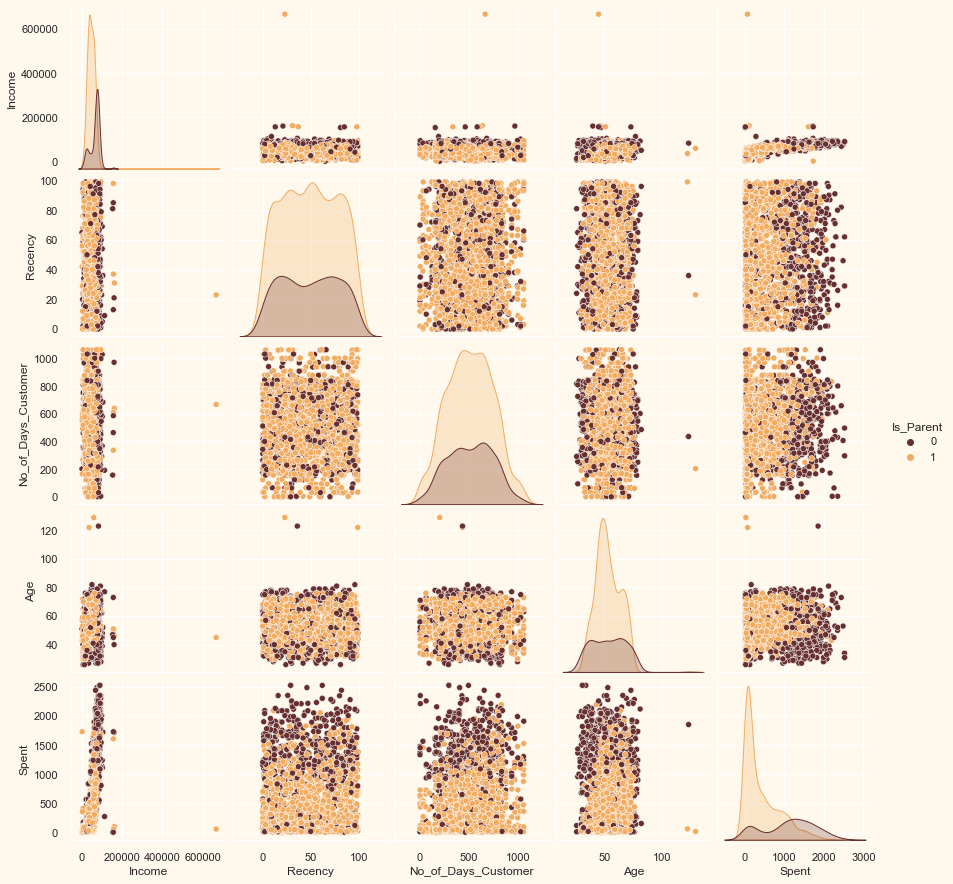

In [20]:
# let's plot some of the features of the dataset

to_plot = [ "Income", "Recency", "No_of_Days_Customer", "Age", "Spent", "Is_Parent"]
plt.figure(figsize=(8,6))
sns.pairplot(data[to_plot], hue='Is_Parent', palette= (["#682F2F","#F3AB60"]));

As we can see from the above graphs, there are outliers present in 'Income' and 'Age'. We will be removing these outliers from our dataset.

In [21]:
# dropping the outliers by setting a cap on Age and Income.

data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
data.shape

(2212, 30)

C:\Users\ANIRUD~1\AppData\Local\Temp/ipykernel_17268/1337948844.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(data_corr, dtype=np.bool)


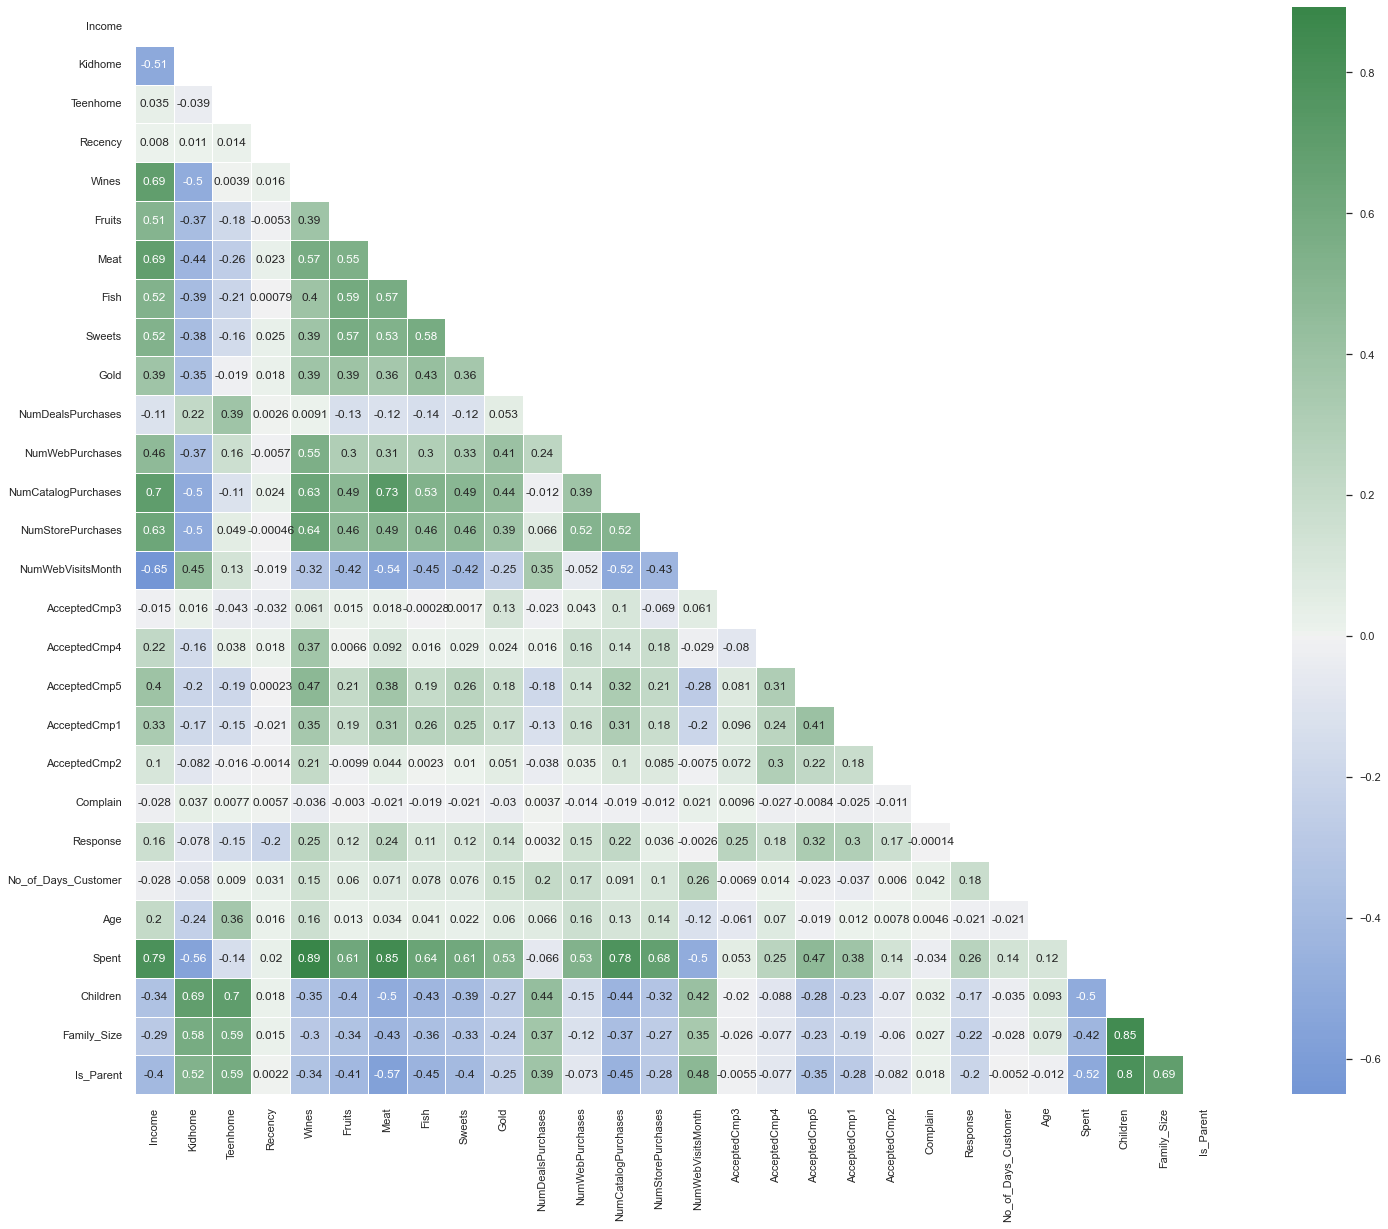

In [22]:
# using correlation matrix to find the correlation between the numeric variables
data_corr = data.corr()

sns.set(style="white")
mask = np.zeros_like(data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(25, 20))

cmap = sns.diverging_palette(255, 133, as_cmap=True)

sns.heatmap(data_corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=0.5, annot=True)

plt.yticks(rotation=0, ha="right")
plt.xticks(rotation=90, ha="center")
plt.show()

## Data Preprocessing

We will be preprocessing the data to perform clustering operations. Data preprocessing is an important step so that the model can read and understand the patterns present in the data.

We will apply the following steps to preprocess the data:

* Label encoding the categorical features
* Scaling the features using the standard scaler
* Creating a subset dataframe for dimensionality reduction

In [23]:
# get list of categorical variables

s = (data.dtypes == 'object')
cat_cols = list(s[s].index)
print("Categorical columns:", cat_cols)

Categorical columns: ['Education', 'Living_With']


In [24]:
# we will use LabelEncoder to encode these 2 categorical columns

le = LabelEncoder()
for i in cat_cols:
    data[i] = data[[i]].apply(le.fit_transform)
    
data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,No_of_Days_Customer,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,971,65,1617,0,0,1,0
1,0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,125,68,27,0,2,3,1
2,0,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,472,57,776,1,0,2,0
3,0,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,65,38,53,1,1,3,1
4,1,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,321,41,422,1,1,3,1


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   int32  
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   Wines                2212 non-null   int64  
 6   Fruits               2212 non-null   int64  
 7   Meat                 2212 non-null   int64  
 8   Fish                 2212 non-null   int64  
 9   Sweets               2212 non-null   int64  
 10  Gold                 2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   i

All features in the dataset have been converted into numerical columns

In [26]:
# let's create a copy of the data
data_copy = data.copy()

# let's create a subset of the data by removing all columns related to promotions and deals
cols_to_del = ['AcceptedCmp3',   'AcceptedCmp4' ,  'AcceptedCmp5', 'AcceptedCmp1' , 'AcceptedCmp2', 'Complain', 'Response']
data_copy = data_copy.drop(cols_to_del, axis=1)

data_copy.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,No_of_Days_Customer,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,971,65,1617,0,0,1,0
1,0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,125,68,27,0,2,3,1
2,0,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,472,57,776,1,0,2,0
3,0,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,65,38,53,1,1,3,1
4,1,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,321,41,422,1,1,3,1


Now we will scale our dataset so that all the features are within the same range of values. Scaling is an important part for clustering algorithms because we need all the features to be within the same range.

In [27]:
# let's scale the data using StandardScaler

scaler = StandardScaler()
scaler.fit(data_copy)
data_scaled = pd.DataFrame(scaler.transform(data_copy), columns=data_copy.columns)
data_scaled

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,No_of_Days_Customer,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,1.973583,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,-0.822130,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,-0.893586,0.430444,-0.822754,0.908097,-0.104347,1.197084,0.419540,0.066770,0.079461,2.213965,3.928291,-0.168701,1.791619,0.111982,-0.555814,-0.132545,0.124112,0.163575,1.218061,0.740959,0.069987,0.449070,0.632456
2208,0.571657,0.560123,2.902796,0.908097,0.241237,0.298631,-0.662628,-0.611184,-0.687527,-0.658360,-0.694954,2.429954,1.426865,-0.229679,-0.248141,0.692181,-1.940414,1.958607,-0.271040,0.740959,2.739158,2.656499,0.632456
2209,-0.893586,0.233347,-0.822754,-0.929699,1.450778,1.787156,0.545373,0.222878,-0.103155,-0.366260,-0.385448,-0.688432,-0.761665,0.111982,2.213242,0.279818,-0.847936,-1.033114,1.052052,-1.349603,-1.264598,-1.758359,-1.581139
2210,0.571657,0.803172,-0.822754,0.908097,-1.417564,0.363866,0.092373,0.209498,0.773403,0.071892,0.330284,-0.168701,0.697355,0.795303,1.290224,-0.957271,-0.843635,1.103830,0.391336,0.740959,0.069987,0.449070,0.632456


Our dataset has been succesfully scaled.

## Dimensionality Reduction

In this problem, there are many factors on the basis of which the final classification will be done. These factors are basically attributes or features. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why dimensionality reduction needs to be performed on the selected features before putting them through a classifier.<br>
<br>
**Dimensionality reduction** is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.<br>
<br>
**Principal component analysis (PCA)** is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.<br>
<br>
Let's reduce the dimensions of our dataset to 3, so we can easily visulaize it.

In [28]:
# reducing the dimensions to 3 using PCA

pca = PCA(n_components=3)
pca.fit(data_scaled)
data_pca = pd.DataFrame(pca.transform(data_scaled), columns=(['col1', 'col2', 'col3']))
data_pca.head()

,col1,col2,col3
0,4.994347,-0.151264,2.648027
1,-2.884455,-0.006683,-1.863815
2,2.617864,-0.720761,-0.252301
3,-2.676036,-1.541981,-0.922568
4,-0.649591,0.209849,-0.021134


In [29]:
data_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-1.345117e-16,2.878377,-5.969394,-2.538494,-0.780421,2.383290,7.444305
col2,2212.0,-3.141951e-17,1.706839,-4.312159,-1.328325,-0.158139,1.242278,6.142753
col3,2212.0,2.795634e-17,1.221957,-3.530856,-0.828829,-0.021933,0.799347,6.616974


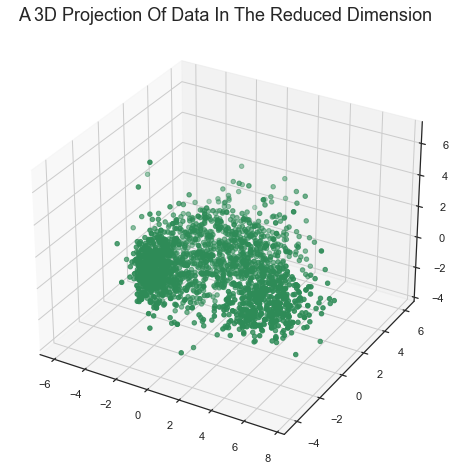

In [30]:
#A 3D projection Of the data In The Reduced Dimension

x =data_pca["col1"]
y =data_pca["col2"]
z =data_pca["col3"]
#To plot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="seagreen", marker="o" )
plt.title("A 3D Projection Of Data In The Reduced Dimension", fontsize=18)
plt.show()

## Clustering

Now that the attributes have been reduced to three dimensions,we will be performing clustering. Some clustering algorithms include  Agglomerative clustering, Kmeans, Birch, DBSCAN. <br>
**Agglomerative clustering** is a hierarchical clustering method. It involves merging examples until the desired number of clusters is achieved.

Steps involved in the Clustering:

* Elbow Method to determine the number of clusters to be formed
* Clustering via Agglomerative Clustering
* Examining the clusters formed via scatter plot

Elbow Method to determine the number of clusters to be formed:


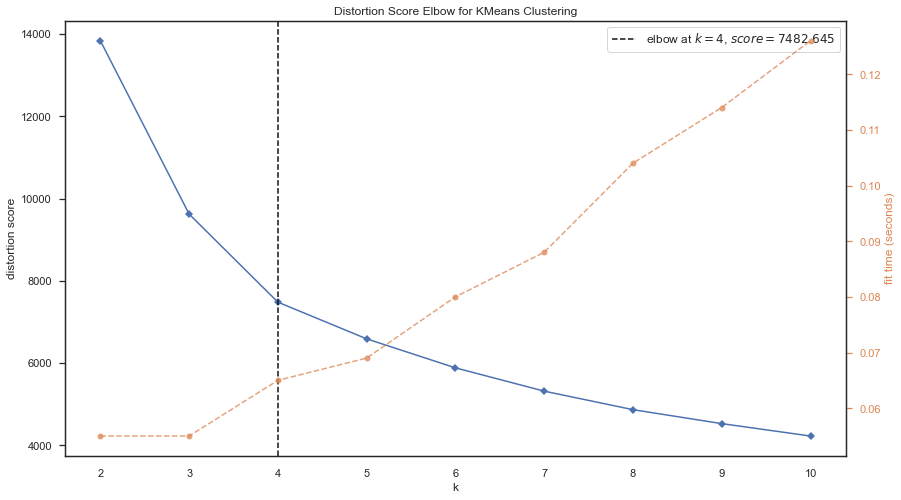

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
print('Elbow Method to determine the number of clusters to be formed:')
elbow = KElbowVisualizer(KMeans(), k=10)
elbow.fit(data_pca)
elbow.show()

Elbow Method to determine the number of clusters to be formed:


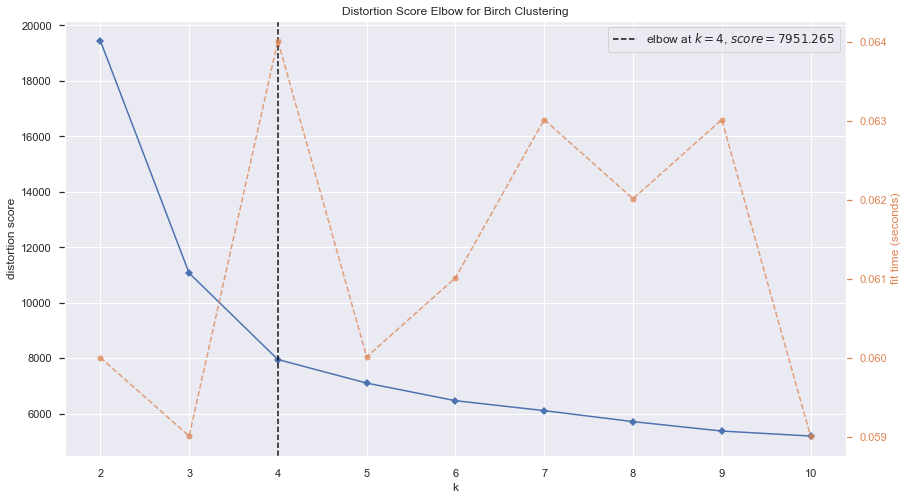

<AxesSubplot:title={'center':'Distortion Score Elbow for Birch Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
print('Elbow Method to determine the number of clusters to be formed:')
elbow = KElbowVisualizer(Birch(), k=10)
elbow.fit(data_pca)
elbow.show()

We can see from the above cell that four will be an optimal number of clusters for this data. Next, we will fit the Agglomerative Clustering Model to get the final clusters.

### Agglomerative Clustering

In [32]:
#let's perform the AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=4)

# fit model and predict clusters
yhat_ac = ac.fit_predict(data_pca) # here, we are assigning each datapoint to a particular cluster
data_pca["Clusters_Agglo"] = yhat_ac

# adding the clusters feature to the orignal dataframe.
data["Clusters_Agglo"]= yhat_ac
data

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,No_of_Days_Customer,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Clusters_Agglo
0,0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,971,65,1617,0,0,1,0,1
1,0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,125,68,27,0,2,3,1,3
2,0,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,472,57,776,1,0,2,0,1
3,0,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,65,38,53,1,1,3,1,2
4,1,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,321,41,422,1,1,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,541,55,1341,1,1,3,1,0
2236,1,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,61,76,444,1,3,5,1,0
2237,0,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,315,41,1241,0,0,1,0,1
2238,1,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,316,66,843,1,1,3,1,0


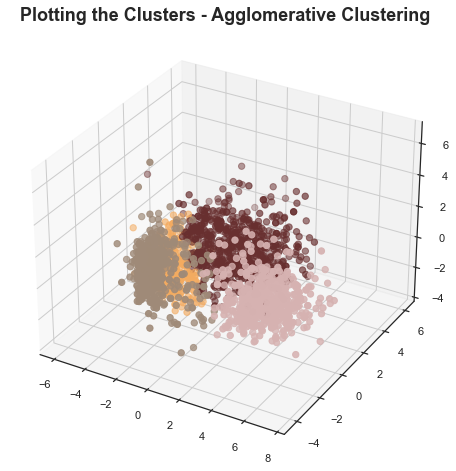

In [33]:
# plotting the clusters

fig = plt.figure(figsize=(12,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=data_pca["Clusters_Agglo"], marker='o', cmap = cmap_new)
plt.title("Plotting the Clusters - Agglomerative Clustering", fontsize=18, fontweight='bold')
plt.show()

### K Means

K-Means Clustering is an unsupervised machine learning algorithm. In contrast to traditional supervised machine learning algorithms, K-Means attempts to classify data without having first been trained with labeled data.

In [34]:
# let's perform KMeans, a partioning algorithm for clustering
kmeans = KMeans(n_clusters=4)

# fit model and predict clusters
yhat_ac = kmeans.fit_predict(data_pca)
data_pca['Clusters_KMeans'] = yhat_ac

# adding the clusters feature to the orignal dataframe.
data["Clusters_KMeans"]= yhat_ac
data

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,No_of_Days_Customer,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Clusters_Agglo,Clusters_KMeans
0,0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,971,65,1617,0,0,1,0,1,0
1,0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,125,68,27,0,2,3,1,3,1
2,0,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,472,57,776,1,0,2,0,1,0
3,0,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,65,38,53,1,1,3,1,2,3
4,1,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,321,41,422,1,1,3,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,541,55,1341,1,1,3,1,0,2
2236,1,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,61,76,444,1,3,5,1,0,2
2237,0,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,315,41,1241,0,0,1,0,1,0
2238,1,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,316,66,843,1,1,3,1,0,2


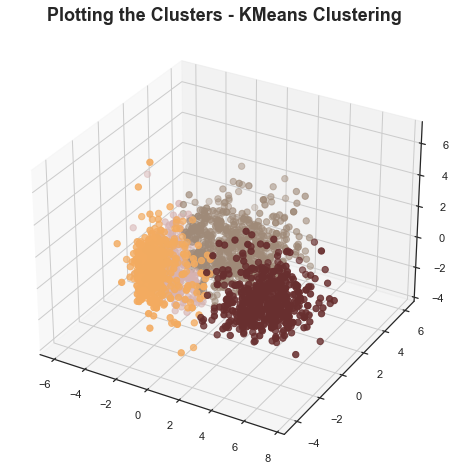

In [35]:
# plotting the clusters

fig = plt.figure(figsize=(12,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=data_pca["Clusters_KMeans"], marker='o', cmap = cmap_new)
plt.title("Plotting the Clusters - KMeans Clustering", fontsize=18, fontweight='bold')
plt.show()

### Birch

Balanced Iterative Reducing and Clustering using Hierarchies (BIRCH) is a clustering algorithm that can cluster large datasets by first generating a small and compact summary of the the large dataset that retains as much information as possible. This smaller summary is then clustered instead of clustering the larger dataset.<br>
<br>
There are 2 importamt terms in Birch algorithm:<br>

**Clustering Feature (CF):**
BIRCH summarizes large datasets into smaller, dense regions called Clustering Feature (CF) entries. Formally, a Clustering Feature entry is defined as an ordered triple, (N, LS, SS) where ‘N’ is the number of data points in the cluster, ‘LS’ is the linear sum of the data points and ‘SS’ is the squared sum of the data points in the cluster. It is possible for a CF entry to be composed of other CF entries.<br>

**CF Tree:**
The CF tree is the actual compact representation that we have been speaking of so far. A CF tree is a tree where each leaf node contains a sub-cluster. Every entry in a CF tree contains a pointer to a child node and a CF entry made up of the sum of CF entries in the child nodes. There is a maximum number of entries in each leaf node. This maximum number is called the threshold. 

In [53]:
# let's perform Birch, a partioning algorithm for clustering
kmeans = Birch(n_clusters=4)

# fit model and predict clusters
yhat_ac = kmeans.fit_predict(data_pca)
data_pca['Clusters_Birch'] = yhat_ac

# adding the clusters feature to the orignal dataframe.
data["Clusters_Birch"]= yhat_ac
data

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,No_of_Days_Customer,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Clusters_Agglo,Clusters_KMeans,Total_Proms,Clusters_Birch
0,0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,971,65,1617,0,0,1,0,1,0,0,1
1,0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,125,68,27,0,2,3,1,3,1,0,3
2,0,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,472,57,776,1,0,2,0,1,0,0,1
3,0,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,65,38,53,1,1,3,1,2,3,0,2
4,1,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,321,41,422,1,1,3,1,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,541,55,1341,1,1,3,1,0,2,0,0
2236,1,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,61,76,444,1,3,5,1,0,2,1,0
2237,0,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,315,41,1241,0,0,1,0,1,0,1,1
2238,1,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,316,66,843,1,1,3,1,0,2,0,0


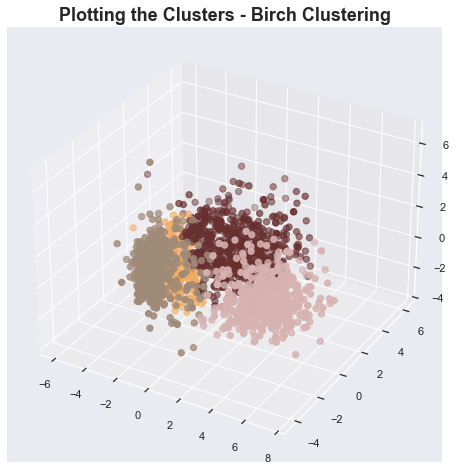

In [54]:
# plotting the clusters

fig = plt.figure(figsize=(12,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=data_pca["Clusters_Birch"], marker='o', cmap = cmap_new)
plt.title("Plotting the Clusters - Birch Clustering", fontsize=18, fontweight='bold')
plt.show()

## Model Evaluation

Clustering is  unsupervised learning so we do not have a target feature unlike classification and regression to evaluate or score our model. Instead, we will try to study the patterns in the clusters formed and determine the nature of the patterns.

We will use EDA(exploratory data analysis) to get a better picture of the clusters and then form conclusions.

Let's have a look at the group distribution of clustering.

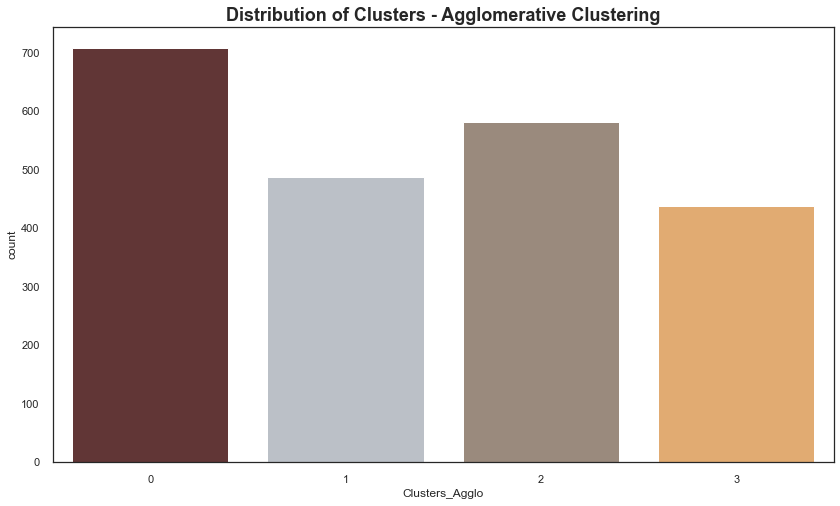

In [36]:
# let's create a countplot

pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
sns.countplot(x=data['Clusters_Agglo'], palette=pal)
plt.title('Distribution of Clusters - Agglomerative Clustering', fontsize=18, fontweight='bold');


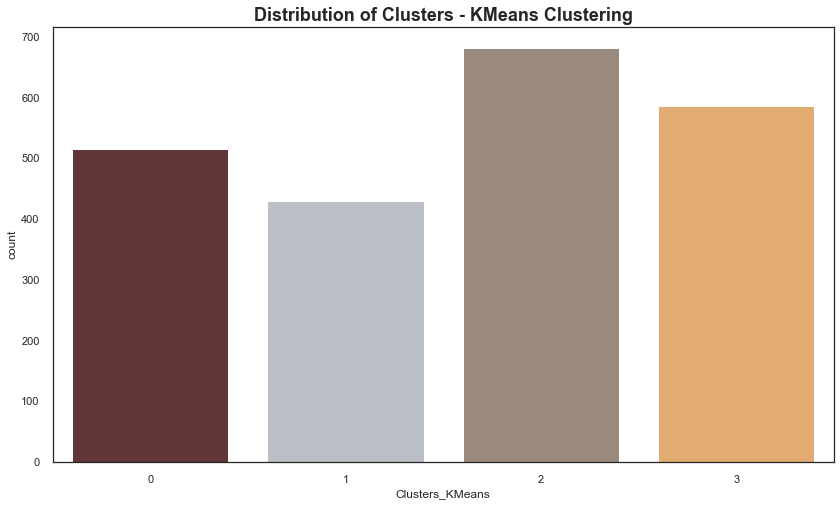

In [37]:
# let's create a countplot

pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
sns.countplot(x=data['Clusters_KMeans'], palette=pal)
plt.title('Distribution of Clusters - KMeans Clustering', fontsize=18, fontweight='bold');


In both the cases, the clusters seem to be fairly distributed.<br>
Let's check how the clusters are distributed based on the customers' spending and income.

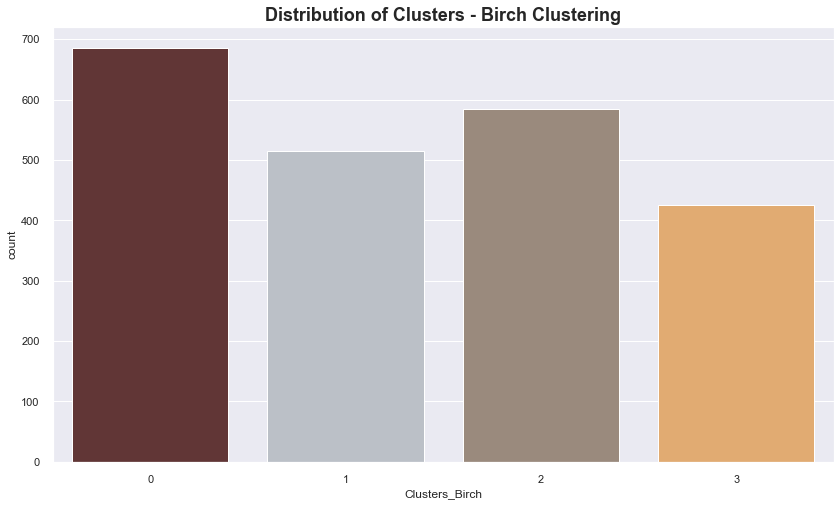

In [55]:
# let's create a countplot

pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
sns.countplot(x=data['Clusters_Birch'], palette=pal)
plt.title('Distribution of Clusters - Birch Clustering', fontsize=18, fontweight='bold');


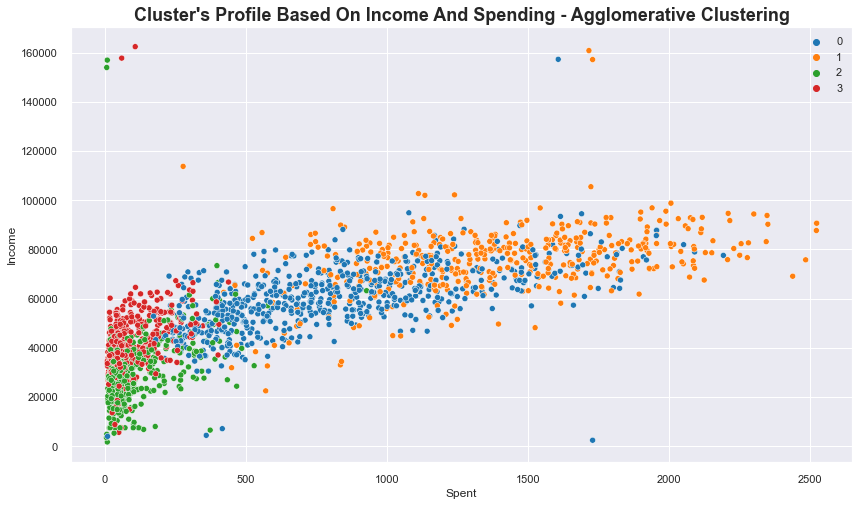

In [38]:
# creating a scatterplot between 'Spent' and 'Income'
sns.set_style('darkgrid')
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters_Agglo"], palette='tab10')
plt.title("Cluster's Profile Based On Income And Spending - Agglomerative Clustering", fontsize=18, fontweight='bold')
plt.legend()
plt.show()

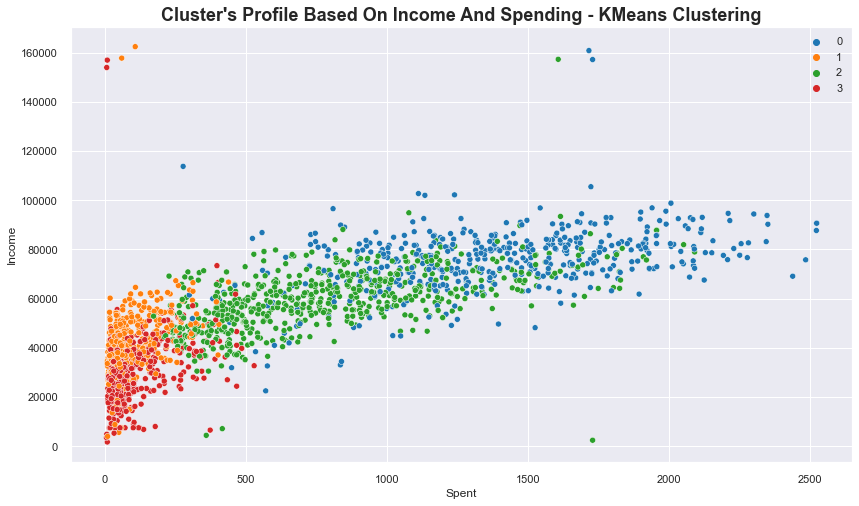

In [39]:
# creating a scatterplot between 'Spent' and 'Income'
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters_KMeans"], palette= 'tab10')
plt.title("Cluster's Profile Based On Income And Spending - KMeans Clustering", fontsize=18, fontweight='bold')
plt.legend()
plt.show()

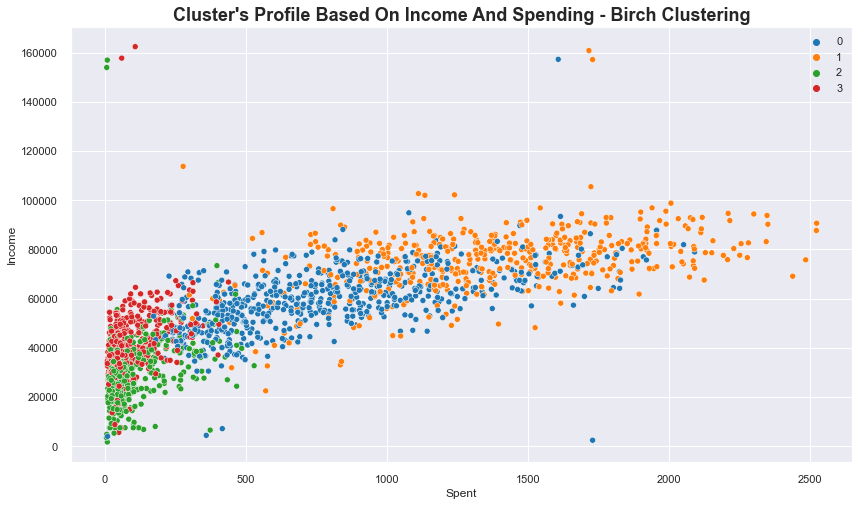

In [56]:
# creating a scatterplot between 'Spent' and 'Income'
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters_Birch"], palette= 'tab10')
plt.title("Cluster's Profile Based On Income And Spending - Birch Clustering", fontsize=18, fontweight='bold')
plt.legend()
plt.show()

Income vs Spending plot shows the clusters pattern

group 0: high spending & average income
group 1: low spending & low income
group 2: high spending & high income
group 3: low spending & average income

Although the above clusters doesn't quite give a good picture about the clustering, so let's take a look at the products consumed by the customers - Wines, Fruits, Meat, Fish, Sweets and Gold


In [40]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,No_of_Days_Customer,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Clusters_Agglo,Clusters_KMeans
0,0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,971,65,1617,0,0,1,0,1,0
1,0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,125,68,27,0,2,3,1,3,1
2,0,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,472,57,776,1,0,2,0,1,0
3,0,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,65,38,53,1,1,3,1,2,3
4,1,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,321,41,422,1,1,3,1,0,2


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 51.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 39.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


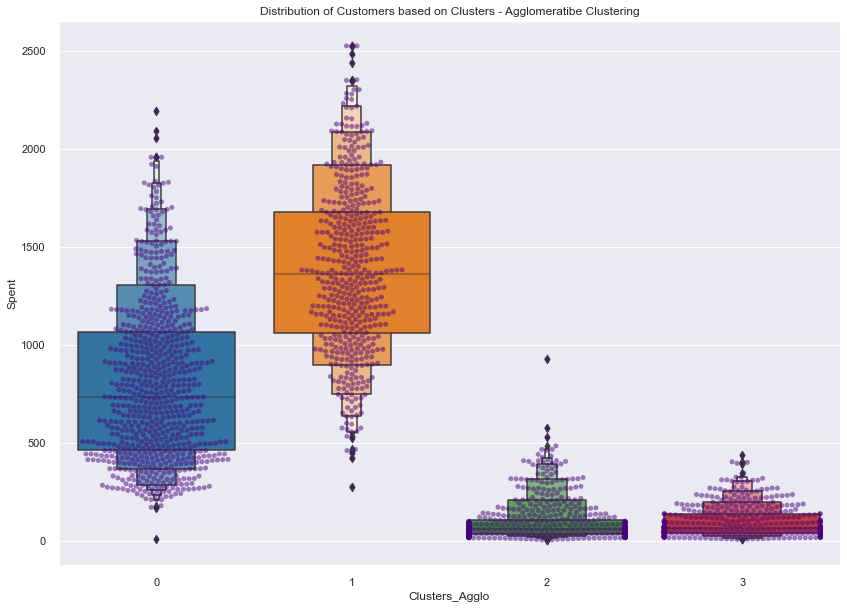

In [41]:
plt.figure(figsize=(14,10))
sns.swarmplot(x= data['Clusters_Agglo'], y = data['Spent'], color= 'indigo', alpha=0.5)
sns.boxenplot(x = data['Clusters_Agglo'], y = data['Spent'], palette='tab10' )
plt.title('Distribution of Customers based on Clusters - Agglomeratibe Clustering')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 38.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 51.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


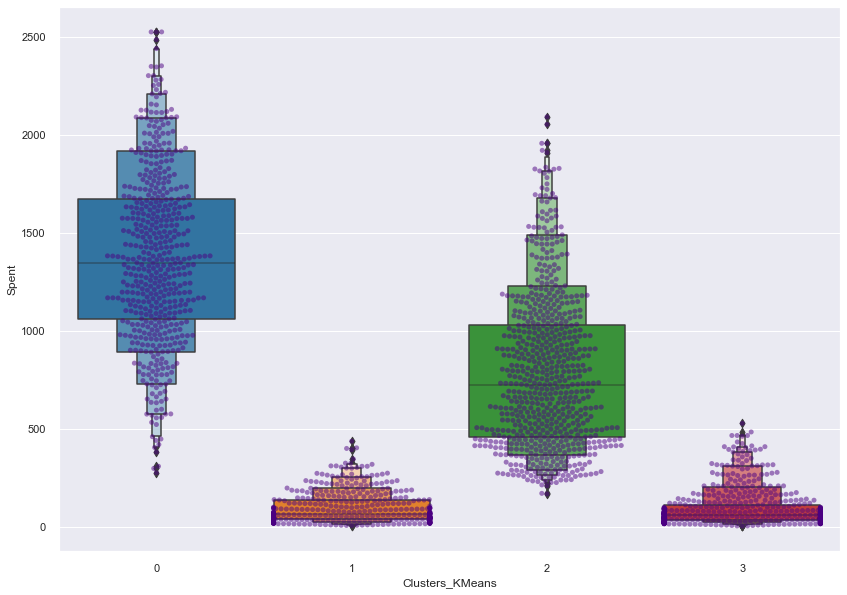

In [42]:
plt.figure(figsize=(14,10))
sns.swarmplot(x= data['Clusters_KMeans'], y = data['Spent'], color= 'indigo', alpha=0.5)
sns.boxenplot(x = data['Clusters_KMeans'], y = data['Spent'], palette='tab10' )
plt.show()

Let's proceed with the Agglomerative Clustering plot. We can see that cluster 2 is our biggest set of customers closely followed by cluster 0. We can explore what each cluster is spending on for the targeted marketing strategies.

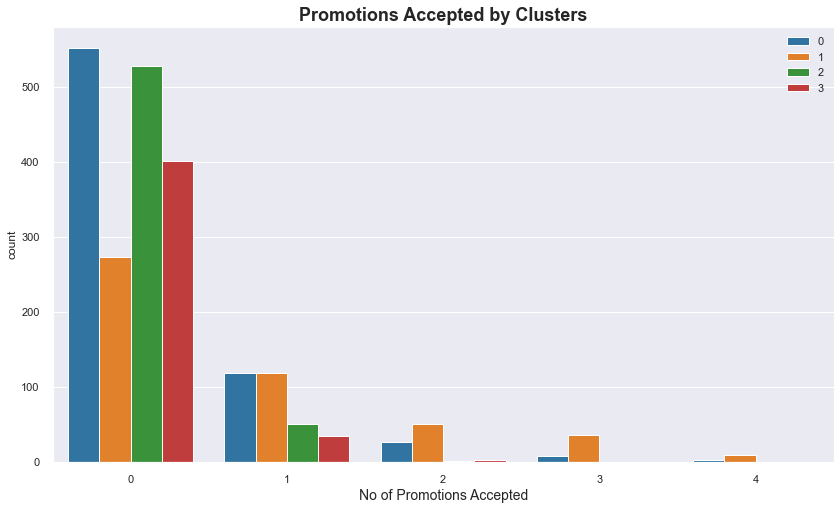

In [43]:
# let's create a feature to add up all the individual promotions
data['Total_Proms'] = data['AcceptedCmp3']+ data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['AcceptedCmp1'] + data['AcceptedCmp2']

# plotting count of total campaigns accepted

sns.countplot(x=data['Total_Proms'], hue= data['Clusters_Agglo'], palette='tab10')
plt.title('Promotions Accepted by Clusters', fontsize=18, fontweight='bold')
plt.xlabel("No of Promotions Accepted", fontsize=14)
plt.legend(loc='upper right')
plt.show()

As we can see from the above plot, there has not been an overwhelming response to the campaigns so far. There are very few participants overall. Moreover, no one part take in all 5 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales.

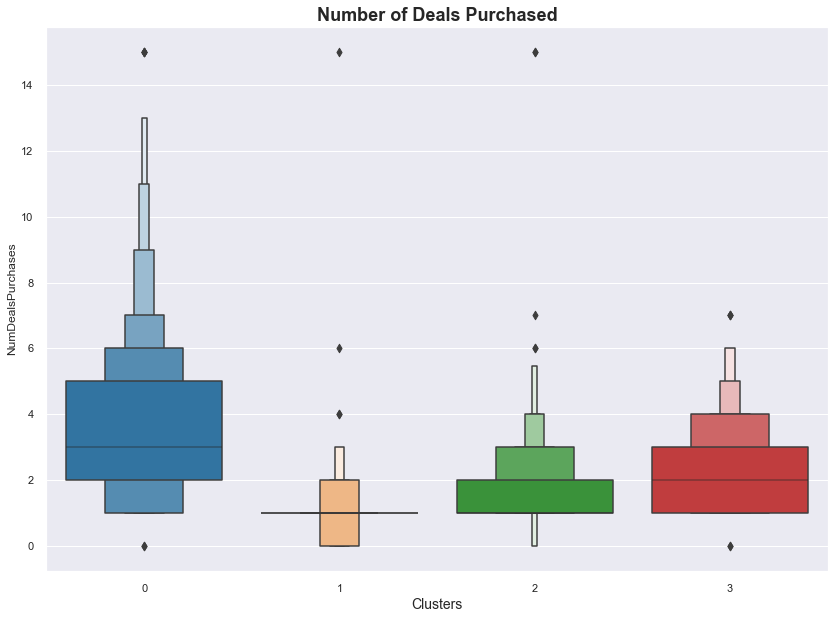

In [44]:
#Plotting the number of deals purchased

plt.figure(figsize=(14, 10))
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters_Agglo"], palette= 'tab10')
plt.xlabel("Clusters", fontsize=14)
plt.title("Number of Deals Purchased", fontsize=18, fontweight='bold')
plt.show()

Unlike the promotions, the deals offered did well. The customer base responded well to the deals.<br>
Cluster 0 shows the best outcome, followed by cluster 3.<br> 
Our star customers cluster 2 are not much into the deals, while nothing seems to attract cluster 1 overwhelmingly.

## Profiling

We have completed forming the clusters and then looked at the customers' purchasing habits. Let's see who all are there in these clusters. For that, we will be profiling the clusters formed and come to a conclusion about who is our star customer and who needs more attention from the retail store's marketing team.

Let's plot some of the features based on the customer's personal traits. We will then try to come to decisions based on our profiling.

<Figure size 864x576 with 0 Axes>

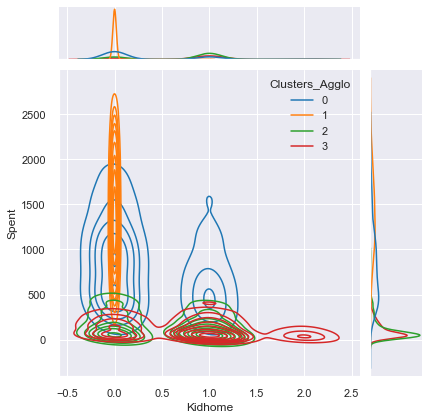

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 864x576 with 0 Axes>

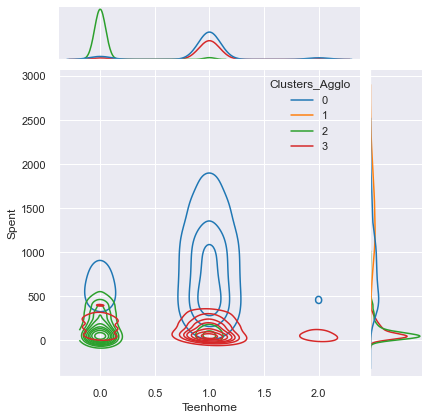

<Figure size 864x576 with 0 Axes>

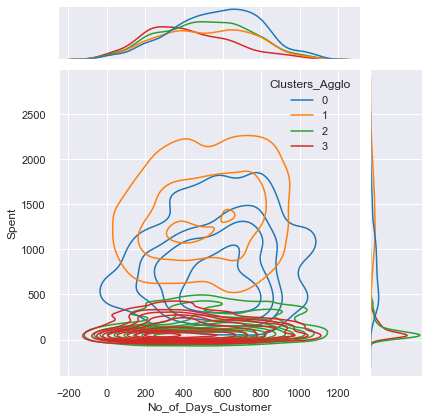

<Figure size 864x576 with 0 Axes>

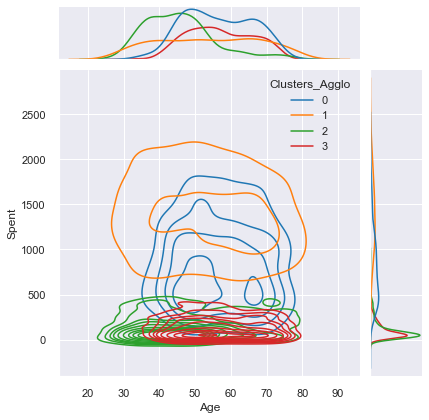

<Figure size 864x576 with 0 Axes>

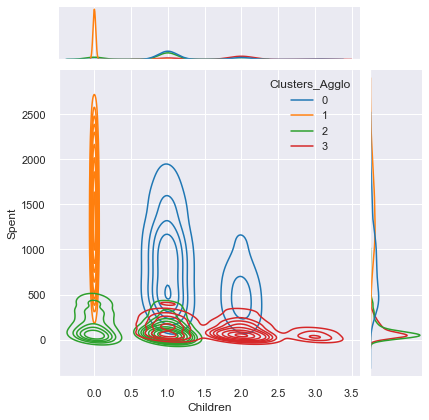

<Figure size 864x576 with 0 Axes>

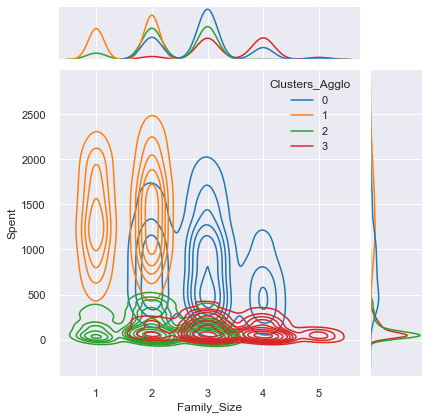

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 864x576 with 0 Axes>

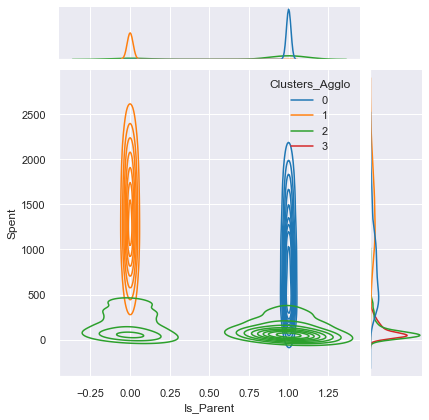

<Figure size 864x576 with 0 Axes>

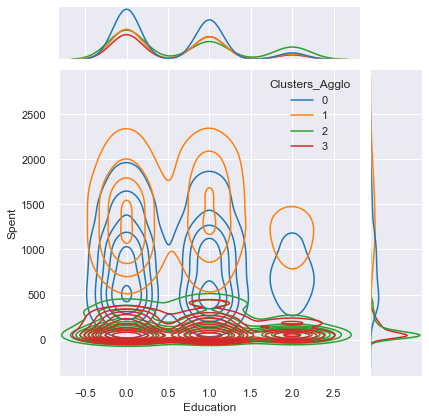

<Figure size 864x576 with 0 Axes>

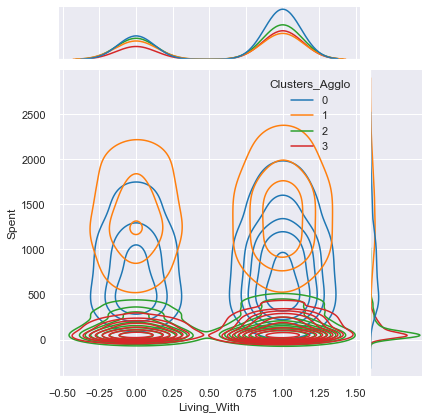

In [45]:
Personal = [ "Kidhome","Teenhome","No_of_Days_Customer", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure(figsize=(12, 8))
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["Clusters_Agglo"], kind="kde", palette='tab10')
    plt.show()

### Cluster No 0
* They are definitely a parent 
* They have a maximun family size of 4 and minimum family size of 2 
* Single parents are a subset of this group (refer Spent vs Living_With)
* Most have a teenager at home

### Cluster No 1
* Definitely not a parent
* Mainly comprises of bachelors/ bachelorettes and couples, with couples having more density
* Has a family size not more than 2
* They are a higher income group
* They span all ages

### Cluster No 2
* The majority of them are parents
* They have little children at home
* They have a max family size of 3, indicating they are young couples or bachelors/bachelorettes

### Cluster No 3
* They are definitely a parent
* They are older couples
* Majority of them have children, many of them have 2 or more children(including teens and kids)
* They are a lower income group
